In [ ]:
# ------------------------------
# STEP 0: Mount Google Drive
# ------------------------------
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 🔎 Image Normalization and Visualization

To reduce acquisition-related variability and prepare images for pixel classification,  
a normalization step was applied to all TEM inputs. Two methods were evaluated:

- **Min–Max normalization**: rescales intensities linearly so that the minimum pixel value becomes 0 and the maximum becomes 255. Since most TEM images already span the full 8-bit range, this procedure has only a minor effect.
- **CLAHE (Contrast Limited Adaptive Histogram Equalization)**: enhances local contrast by applying histogram equalization within small tiles of the image, while limiting amplification of noise. This method significantly improves the visibility of flake boundaries and subtle morphological features.

For each image, the notebook produces a **publication-ready visualization** with three panels:
1. **Original image** (left),
2. **Histogram of pixel intensities** before and after normalization (center),
3. **Normalized image** (right).

Normalized images are saved in TIFF format for reproducibility and further use in Ilastik and deep learning pipelines.


Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/1AC_UT_GO_02_01_2000X_0002.tiff


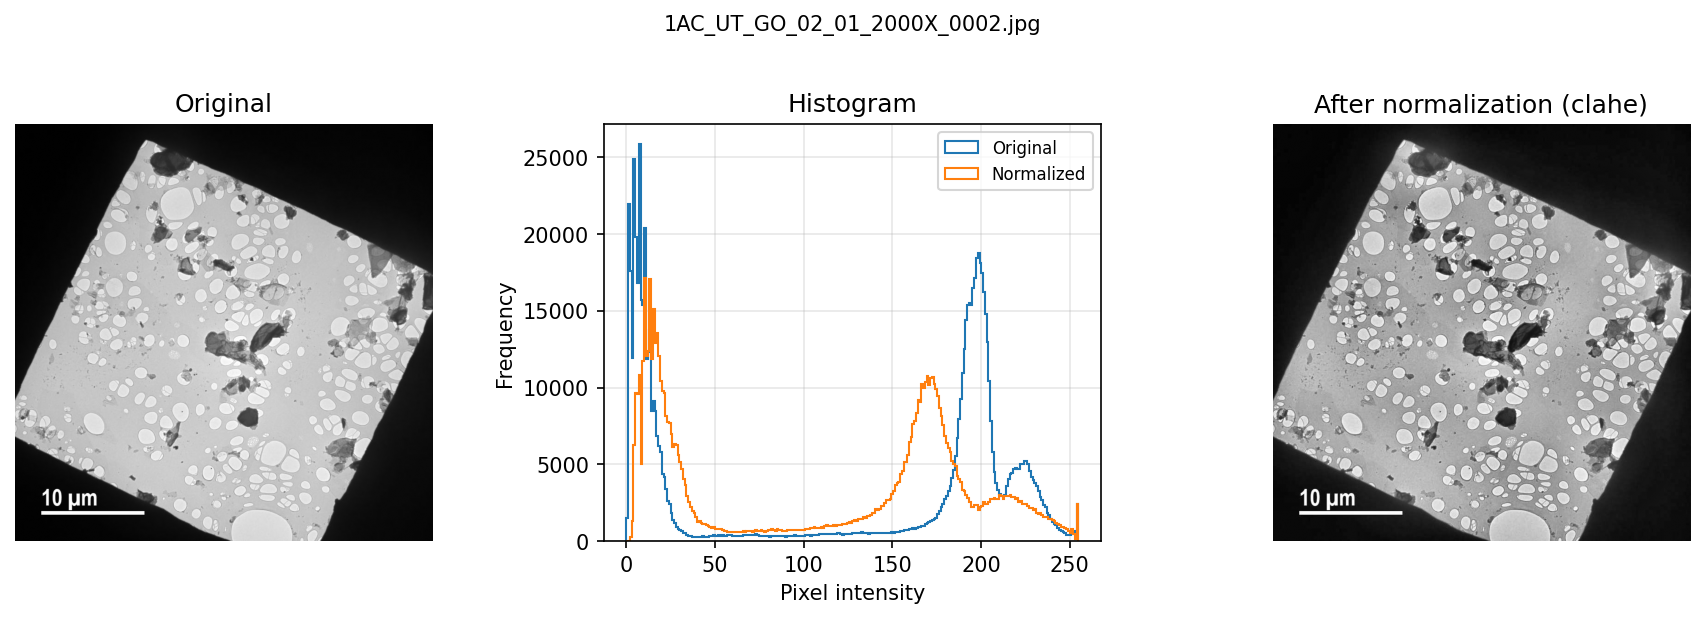

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/2AC_UT_GO_02_01_2000X_0003.tiff


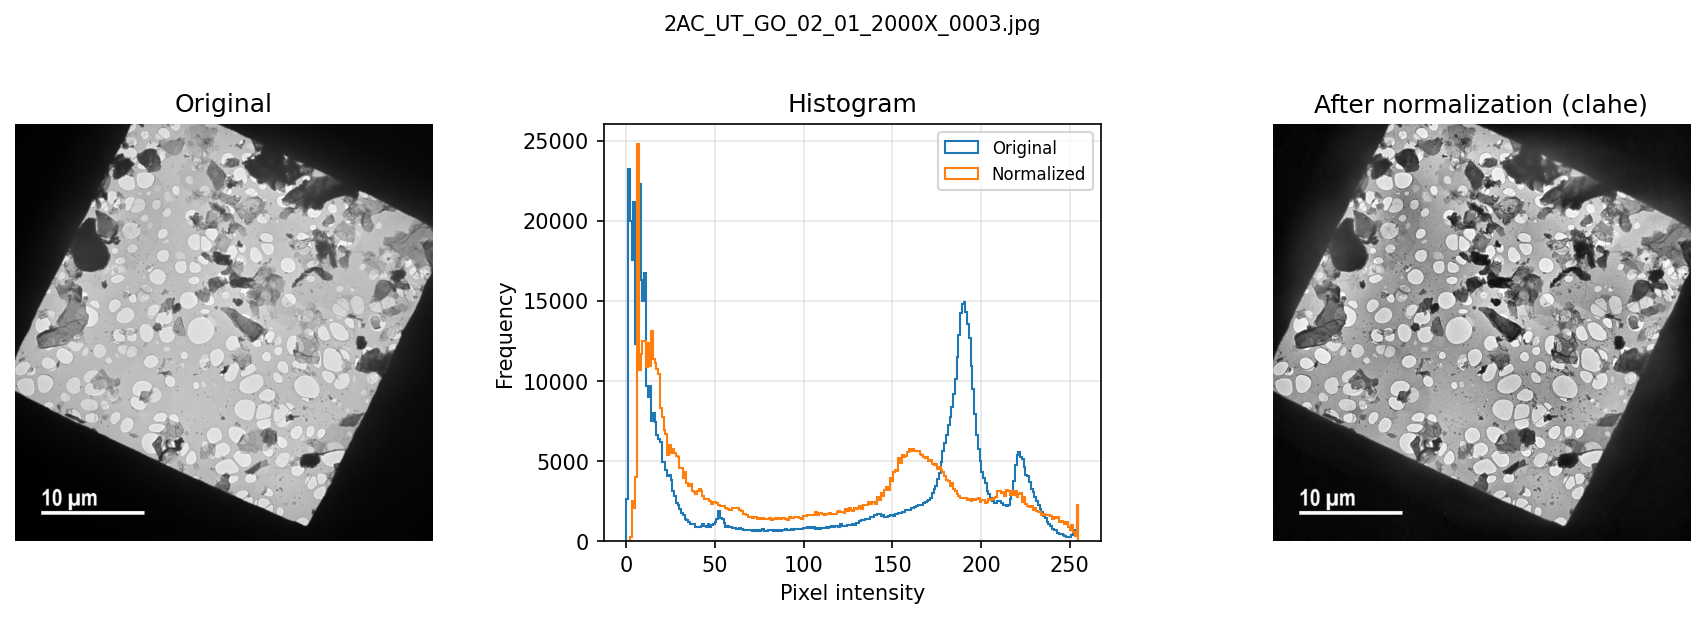

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/3AC_UT_GO_02_01_2000X_0004.tiff


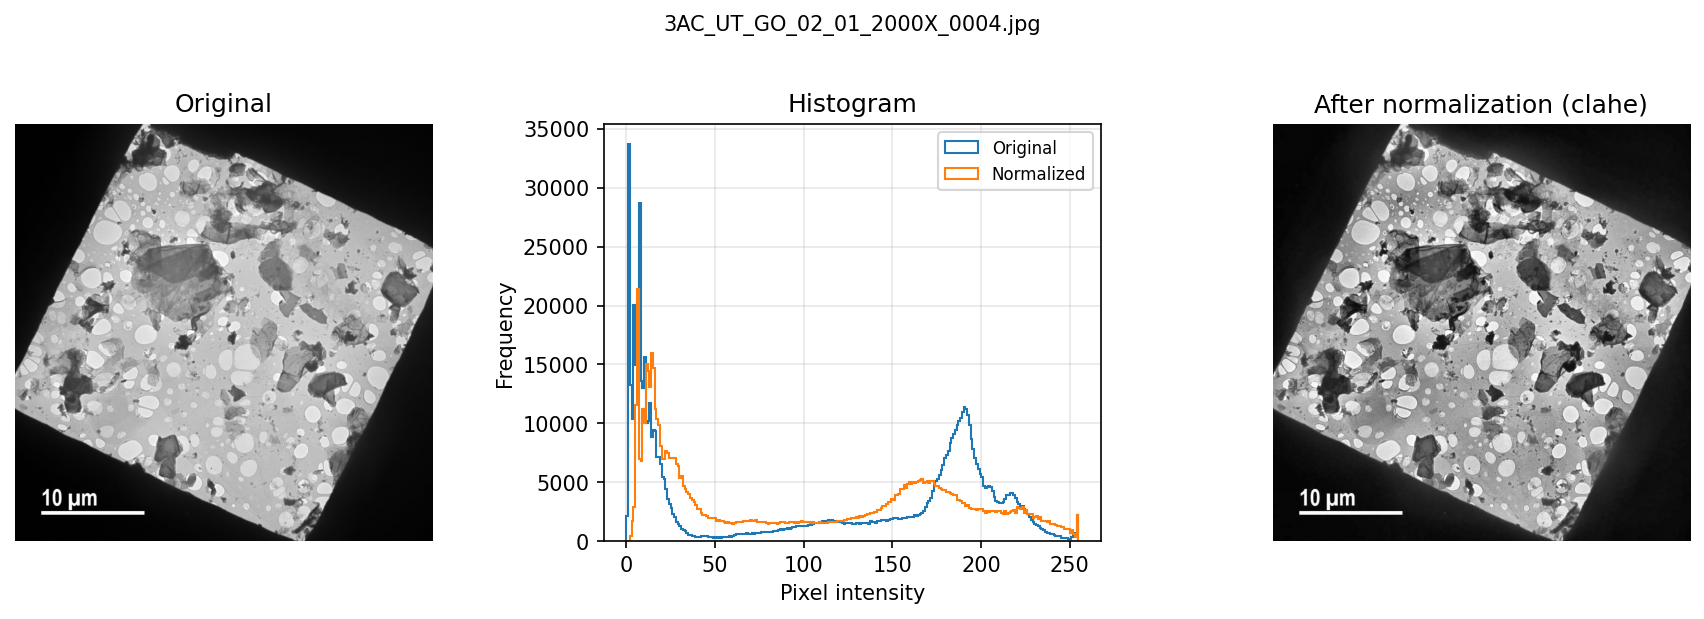

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/4AC_UT_GO_02_01_2000X_0005.tiff


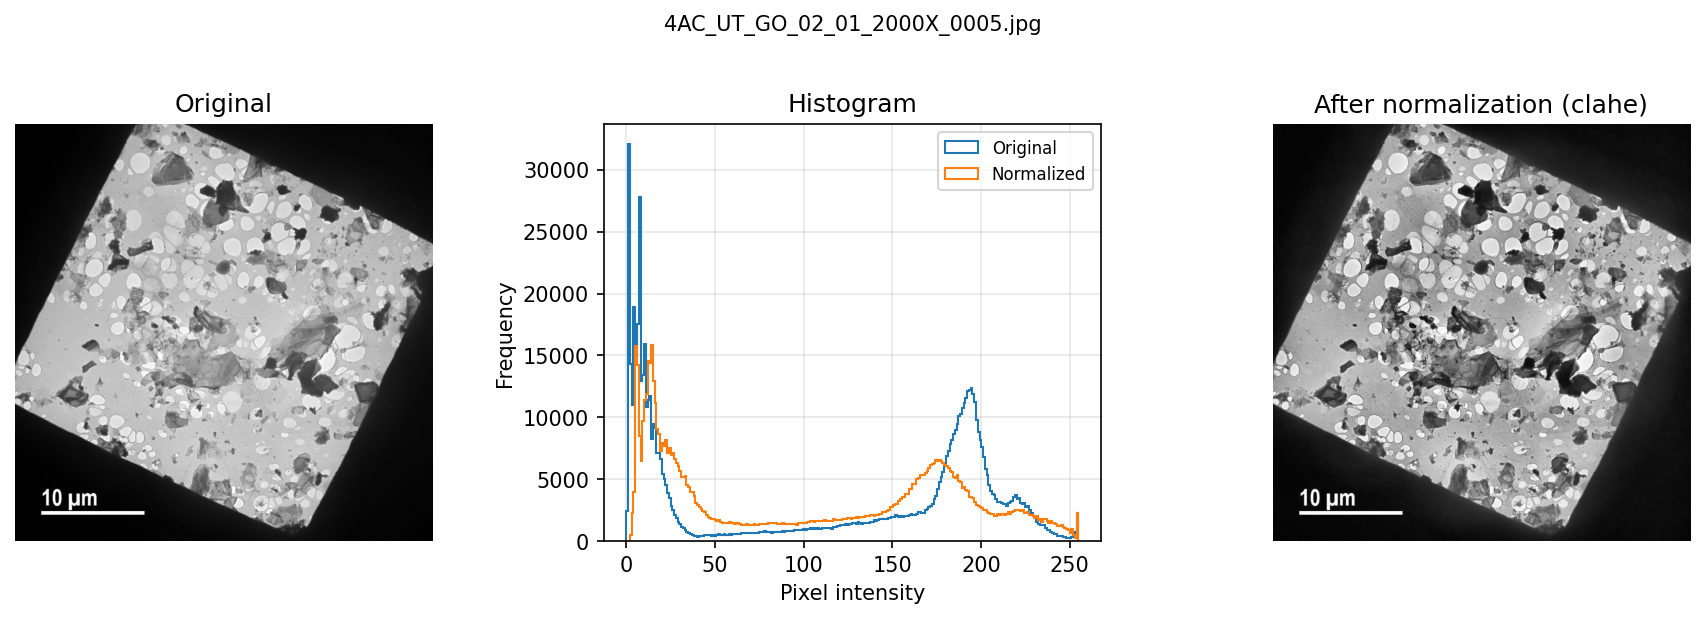

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/5AC_UT_GO_02_01_40000X_0012.tiff


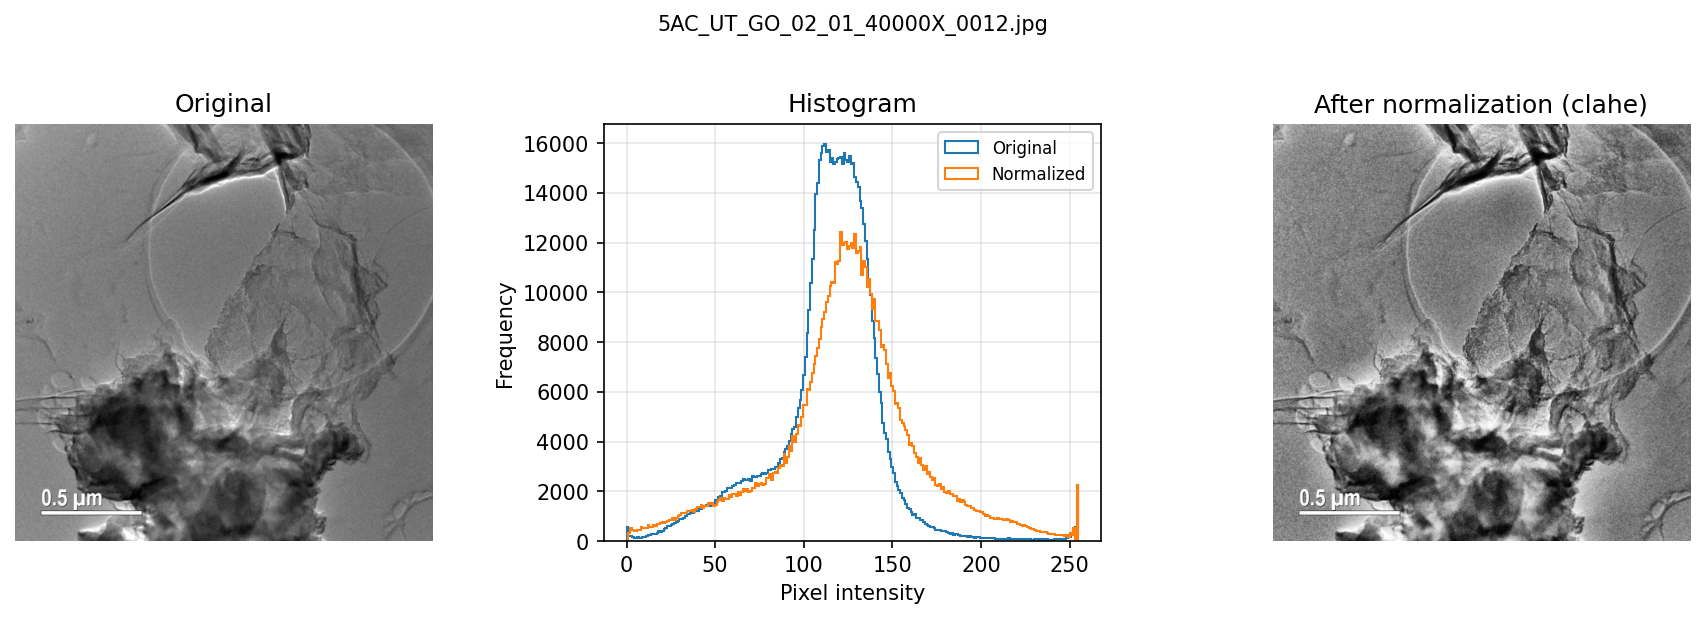

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/6AC_UT_GO_02_01_40000X_0021.tiff


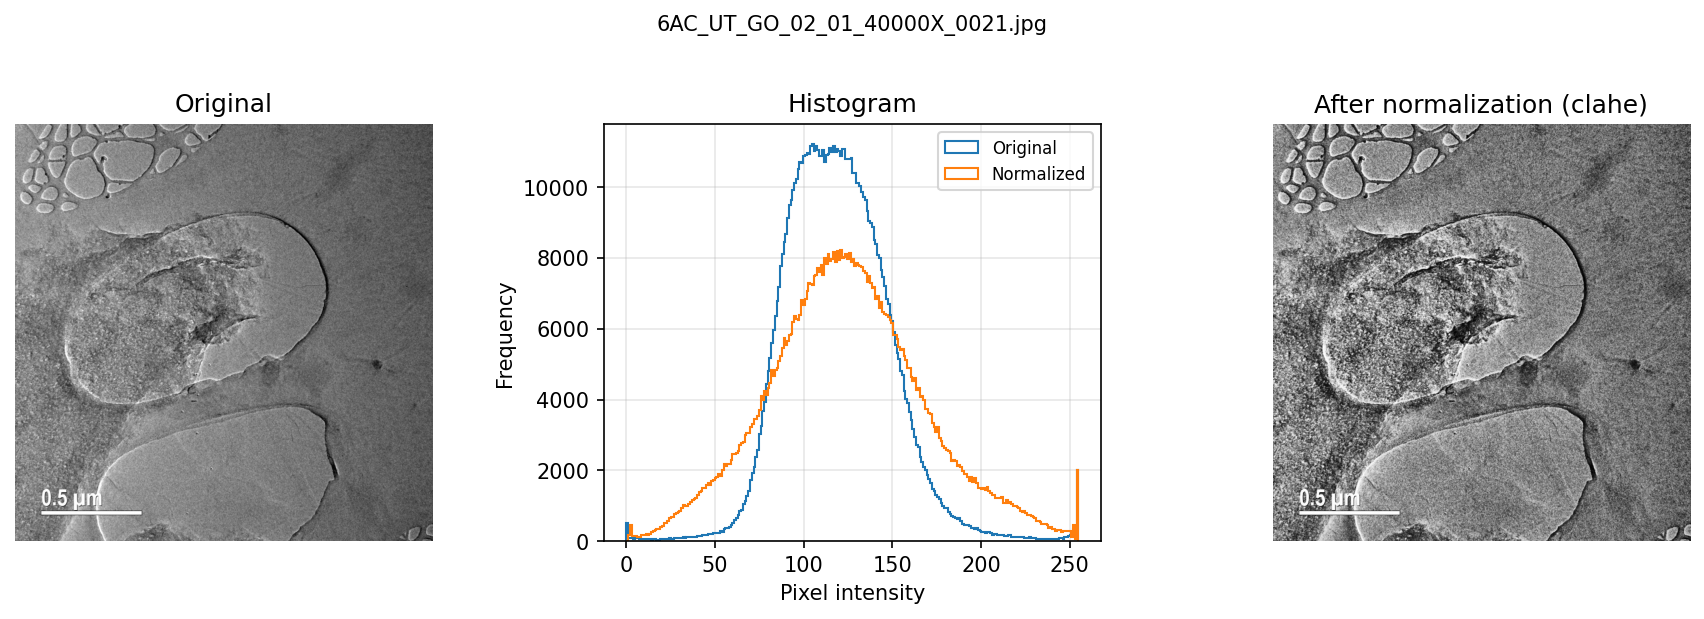

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/AC_UT_GO 06_03_2000X_0001.tiff


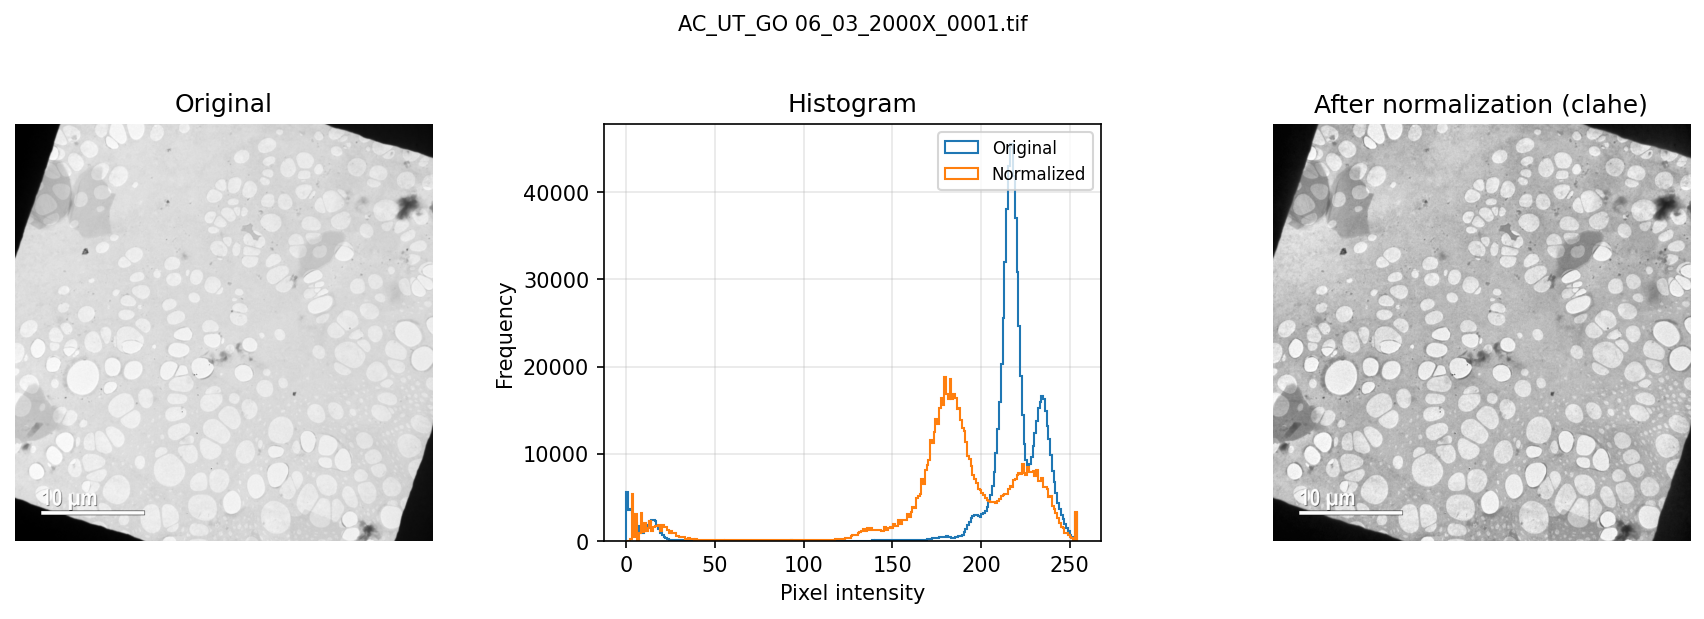

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/AC_UT_GO 06_03_2000X_0002.tiff


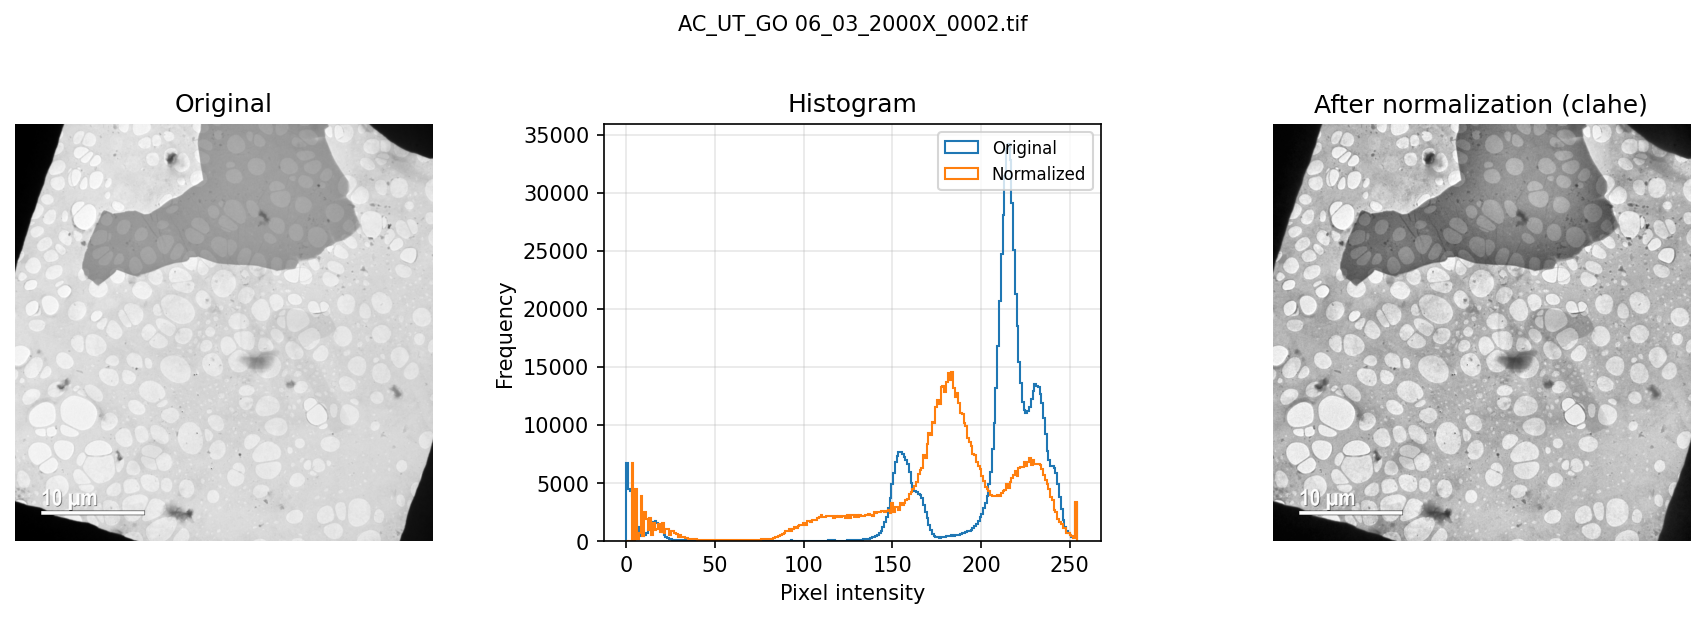

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/AC_UT_GO 06_03_2000X_0003.tiff


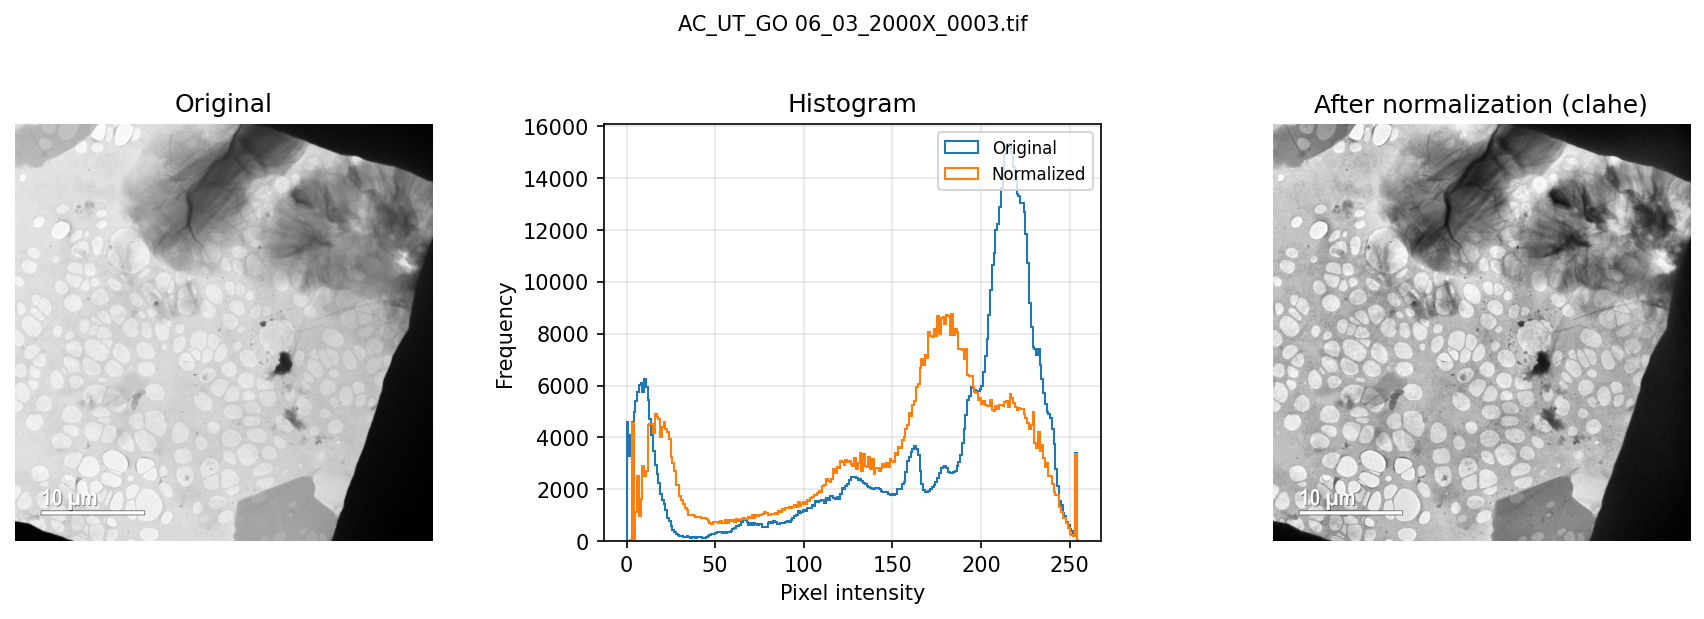

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/AC_UT_GO 06_03_2000X_0004.tiff


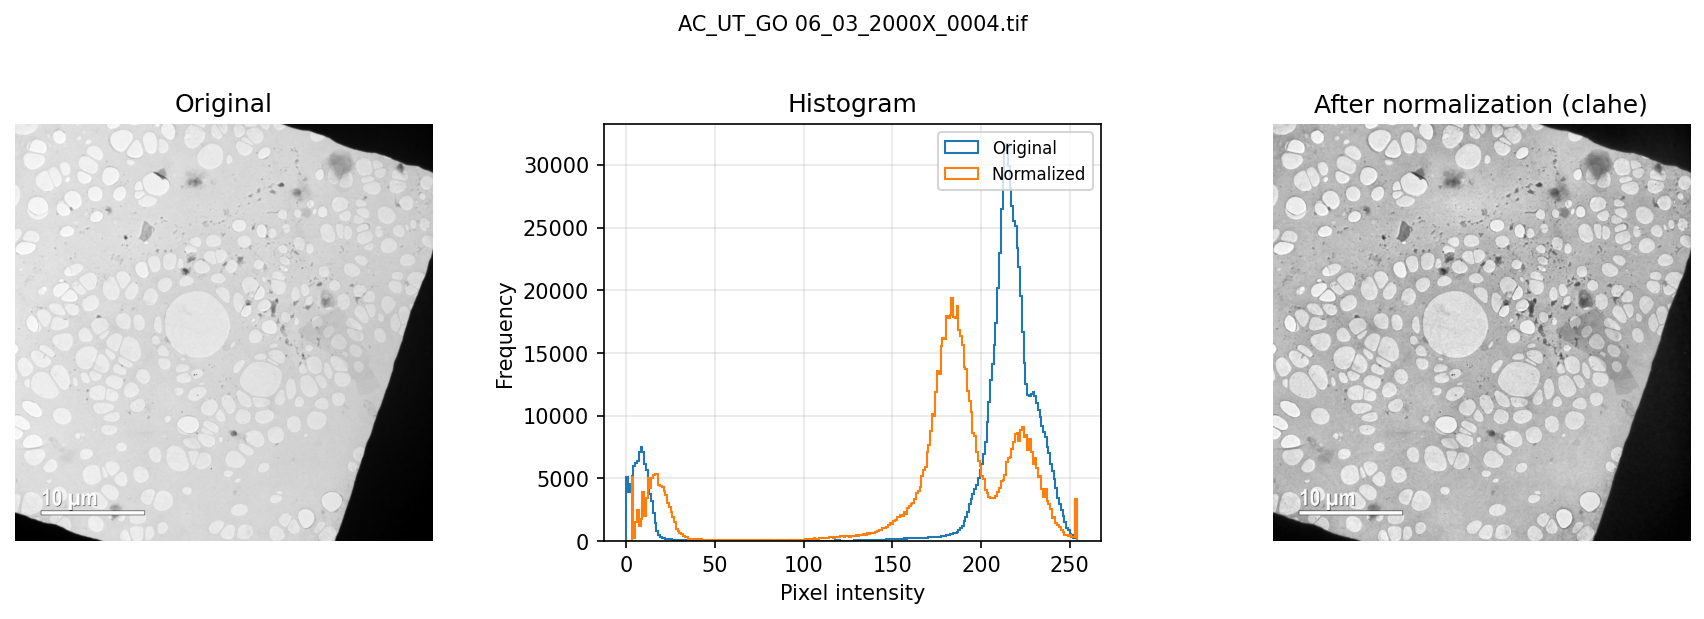

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/AC_UT_GO_01_01_2000X_0001.tiff


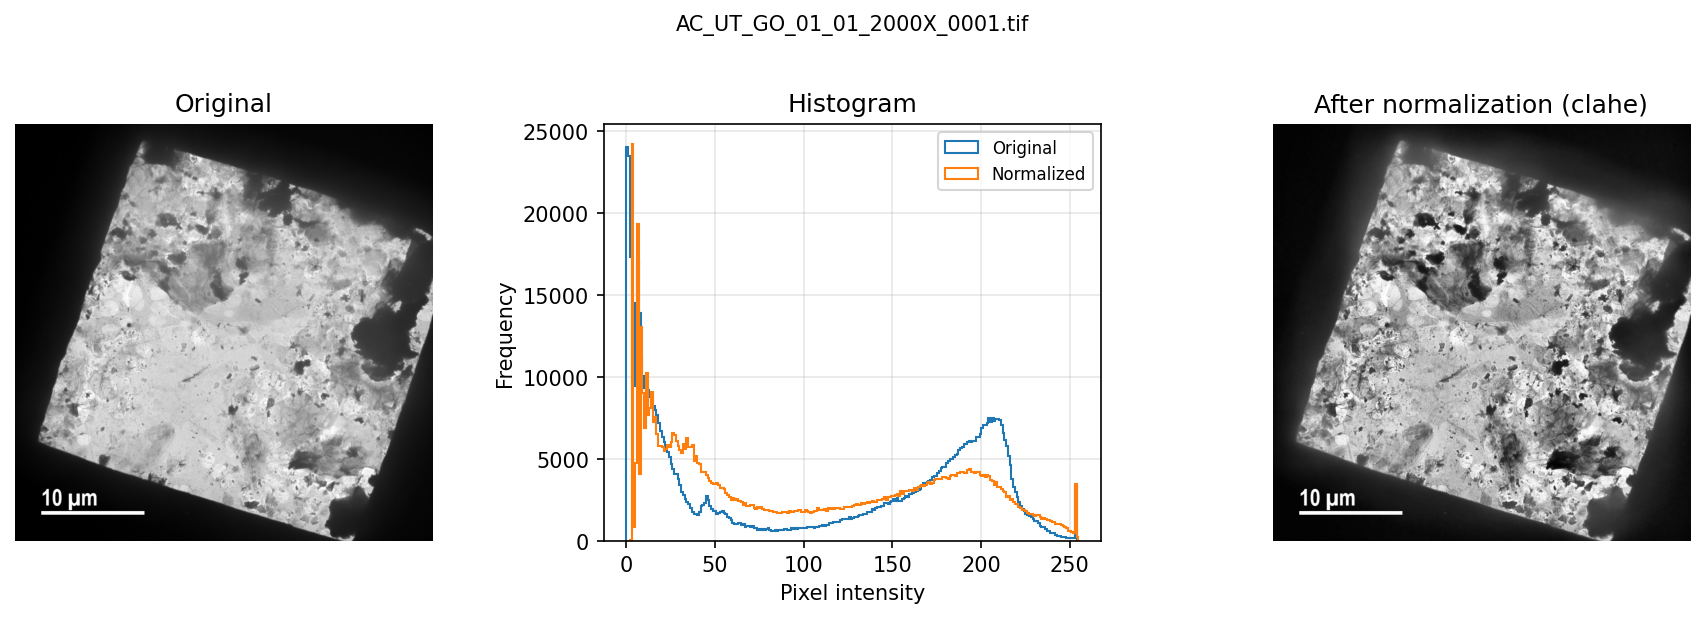

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/AC_UT_GO_01_01_2000X_0002.tiff


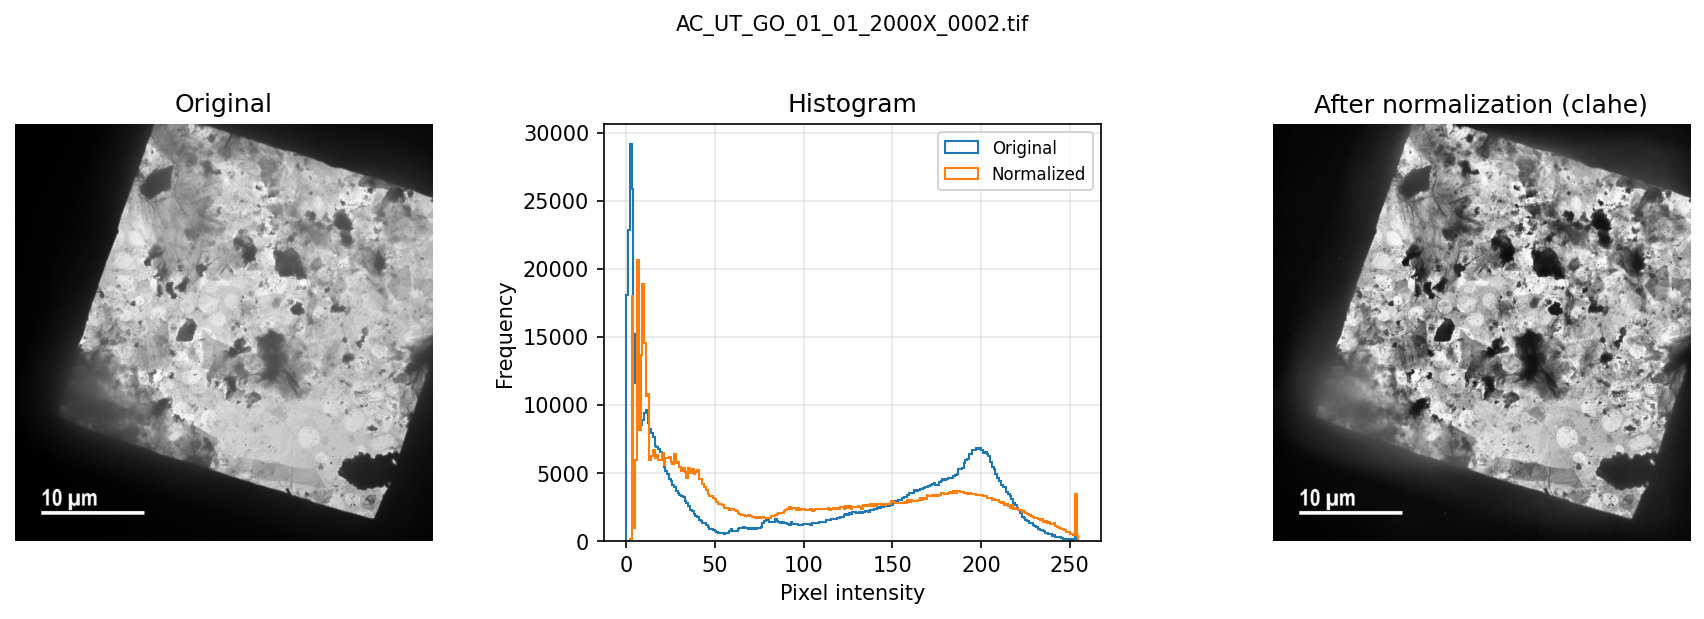

Saved normalized image: /content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/AC_UT_GO_01_01_2000X_0003.tiff


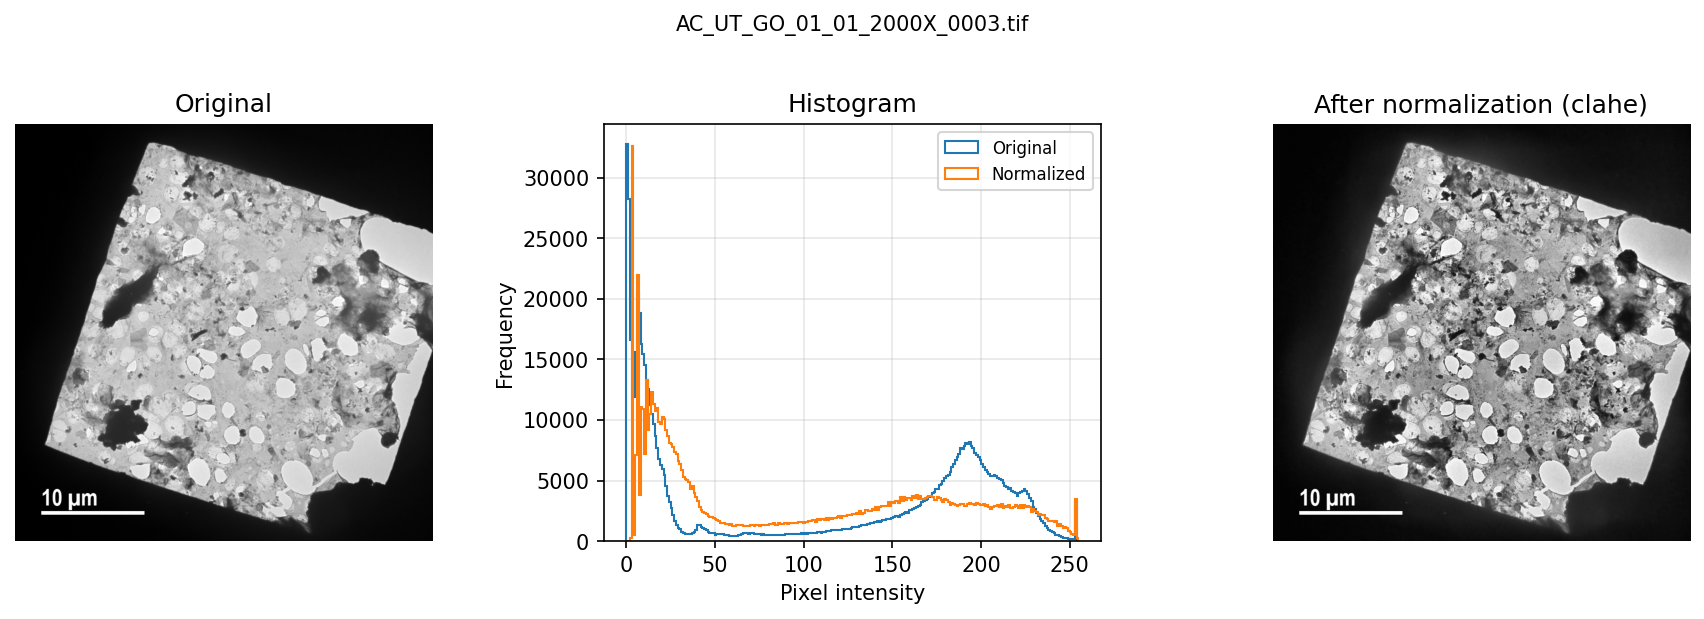

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
# Choose normalization method: 'minmax' or 'clahe'
NORMALIZATION_METHOD = 'clahe'  # or 'minmax'

# Paths
folder_path  = '/content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_original/'
output_folder = '/content/drive/MyDrive/02 ACCORDS/ACC_ImageCharacterisation/notebooks/ilastik/images_normalized/test/'
os.makedirs(output_folder, exist_ok=True)

# --- NORMALIZATION METHODS ---
def normalize_minmax(img):
    """Global min-max scaling to [0,255]."""
    norm_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return norm_img.astype(np.uint8)

def normalize_clahe(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    """Contrast Limited Adaptive Histogram Equalization (CLAHE)."""
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(img)

def normalize_image(img):
    if NORMALIZATION_METHOD == 'minmax':
        return normalize_minmax(img)
    elif NORMALIZATION_METHOD == 'clahe':
        return normalize_clahe(img)
    else:
        raise ValueError("Unknown normalization method: choose 'minmax' or 'clahe'")

# --- MAIN PROCESSING ---
valid_ext = ('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp')

for filename in sorted(os.listdir(folder_path)):
    if not filename.lower().endswith(valid_ext):
        continue

    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error reading {filename}")
        continue

    # Normalize
    norm_img = normalize_image(img)

    # Save normalized image as TIFF
    output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.tiff')
    cv2.imwrite(output_path, norm_img)
    print(f"Saved normalized image: {output_path}")

    # --- Publication-style visualization ---
    fig = plt.figure(figsize=(12, 4), dpi=150)

    # (1) Original
    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax1.set_title('Original')
    ax1.axis('off')

    # (2) Histogram
    ax2 = plt.subplot(1, 3, 2)
    ax2.hist(img.flatten(), bins=256, range=(0, 255), histtype='step', label='Original')
    ax2.hist(norm_img.flatten(), bins=256, range=(0, 255), histtype='step', label='Normalized')
    ax2.set_title('Histogram')
    ax2.set_xlabel('Pixel intensity')
    ax2.set_ylabel('Frequency')
    ax2.legend(loc='upper right', fontsize=8)
    ax2.grid(alpha=0.3)

    # (3) Normalized
    ax3 = plt.subplot(1, 3, 3)
    ax3.imshow(norm_img, cmap='gray', vmin=0, vmax=255)
    ax3.set_title(f'After normalization ({NORMALIZATION_METHOD})')
    ax3.axis('off')

    fig.suptitle(filename, fontsize=10, y=1.02)
    plt.tight_layout()
    plt.show()
